In [1]:
# READ the nutrition file from local machine

import pandas as pd

DF1 = pd.read_csv("nutrition_subset.csv")

DF1

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


In [2]:
# List the top 5 saturated fat for food item

# In this case, one cheesecake has 119.9 saturated fat
# a half of a gallon of vanlla ice cream has 119.3 saturated fat 
# a yellowcake has 92 saturated fat
# 1 creme pie has 90.1 saturated fat
# a cup of lard has 80.4 saturated fat


DF1.nlargest(5, ['saturated_fat'])

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


In [3]:
# calculate the saturated fat per gram, then insert it to a new columns



saturatedFatPerGram =  DF1.saturated_fat/DF1.weight_in_grams

DF1.insert(4, "saturated_fat_per_gram", saturatedFatPerGram)

DF1

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000
...,...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0,0.000000
957,TEA; BREWED 8 FL OZ,240.00,0.0,0,0.000000
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0,0.000000
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0,0.000000


In [4]:
# print out the top five of saturated_fat_per_gram

DF1.nlargest(5,["saturated_fat_per_gram"])

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
912,BUTTER; SALTED 1 PAT,5.0,2.5,11,0.500000


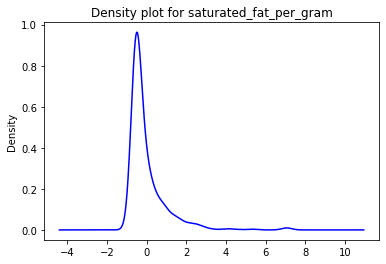

In [5]:
#create the density plot of the saturated_fat_per_gram
from scipy import stats
import matplotlib.pyplot as plt


DF1['saturated_fat_per_gram'] = stats.zscore(DF1.saturated_fat_per_gram, nan_policy='omit')


DF1.saturated_fat_per_gram.plot.density(color="blue")
plt.title('Density plot for saturated_fat_per_gram')
plt.show()

In [6]:
# describe the saturated_fat_per_gram

DF1['saturated_fat_per_gram'].describe()

count    9.610000e+02
mean     1.370161e-16
std      1.000521e+00
min     -5.623352e-01
25%     -5.623352e-01
50%     -4.412993e-01
75%      1.539996e-01
max      7.110475e+00
Name: saturated_fat_per_gram, dtype: float64

In [7]:
# Determine the  high outliers using the three sigma rule 

DF1_HighOutliers = DF1.query('(saturated_fat_per_gram > 3)')['saturated_fat_per_gram']

DF1_HighOutliers 

210    4.240676
448    3.938687
492    4.204266
576    3.942889
709    7.082741
710    7.082741
890    5.371375
898    3.278227
899    5.373078
907    3.223726
908    7.110475
909    7.110475
912    7.002408
913    7.002408
920    4.732985
Name: saturated_fat_per_gram, dtype: float64

In [8]:
# Determine the low outliers using the three sigma rule 
#there is no low outliers

DF1_LowOutliers = DF1.query('(saturated_fat_per_gram < -3)')['saturated_fat_per_gram']

DF1_LowOutliers 

Series([], Name: saturated_fat_per_gram, dtype: float64)

In [10]:
# Load the impute package
# import the numpy

from sklearn.impute import SimpleImputer
import numpy as np


# also try to use mediam to input the saturated_fat_per_gram
imputer = SimpleImputer(missing_values=0, strategy='median')

DF1.saturated_fat_per_gram = imputer.fit_transform(DF1['saturated_fat_per_gram'].values.reshape(-1,1))[:,0]

print(DF1.saturated_fat_per_gram)

0     -0.562335
1     -0.135401
2     -0.562335
3      2.319472
4      2.327397
         ...   
956   -0.562335
957   -0.562335
958   -0.562335
959   -0.562335
960   -0.562335
Name: saturated_fat_per_gram, Length: 961, dtype: float64


In [17]:
# standadize the numeric value
# and describe the weight in grams
DF1['weight_in_gram'] = stats.zscore(DF1.cholesterol, nan_policy='omit')

DF1['saturated_fat'] = stats.zscore(DF1.saturated_fat, nan_policy='omit')

DF1['cholesterol'] = stats.zscore(DF1.cholesterol, nan_policy='omit')

DF1['weight_in_gram'].describe()

count    9.610000e+02
mean    -6.170345e-16
std      1.000521e+00
min     -2.715103e-01
25%     -2.715103e-01
50%     -2.715103e-01
75%     -1.047021e-01
max      1.685135e+01
Name: weight_in_gram, dtype: float64

In [12]:
# descirbe the saturated_fat
DF1['saturated_fat'].describe()

count    9.610000e+02
mean     2.533527e-16
std      1.000521e+00
min     -3.713291e-01
25%     -3.713291e-01
50%     -3.340809e-01
75%     -6.403128e-02
max      1.079383e+01
Name: saturated_fat, dtype: float64

In [13]:
#describe the saturated_fat
DF1['cholesterol'].describe() 

count    9.610000e+02
mean    -6.330928e-16
std      1.000521e+00
min     -2.715103e-01
25%     -2.715103e-01
50%     -2.715103e-01
75%     -1.047021e-01
max      1.685135e+01
Name: cholesterol, dtype: float64

In [14]:
# range the outlier and print the weight in grams
DF1_Outliers = DF1.query('(weight_in_grams > 3 | weight_in_grams < -3 )')['weight_in_grams']

DF1_Outliers

45      3.148058
351     4.357418
361     8.152305
376     5.066353
378    16.851355
384     8.902942
386     4.474184
406     4.332397
410     4.716056
422     9.595197
423     4.532567
430     5.191459
452     6.876222
458     4.807800
466     3.698526
479     5.032991
535     5.591799
Name: weight_in_grams, dtype: float64

In [15]:
# range the outlier and print the cholesterol

DF1_Outliers2 = DF1.query('(cholesterol > 3 | cholesterol < -3 )')['cholesterol']

DF1_Outliers2

45      3.148058
351     4.357418
361     8.152305
376     5.066353
378    16.851355
384     8.902942
386     4.474184
406     4.332397
410     4.716056
422     9.595197
423     4.532567
430     5.191459
452     6.876222
458     4.807800
466     3.698526
479     5.032991
535     5.591799
Name: cholesterol, dtype: float64

In [16]:
# range the outlier and print the saturated fat

DF1_Outliers3 = DF1.query('(saturated_fat > 3 | saturated_fat < -3 )')['saturated_fat']

DF1_Outliers3

376     4.061209
378    10.793826
384     4.470940
410     4.806174
422     5.774628
423     4.079833
430     3.185876
458     8.195762
466     6.268167
479     3.502486
535    10.644833
581     8.018833
587     4.731677
588     3.930841
709     4.945855
710     4.945855
890     7.115564
901     3.027571
905     3.278997
907     4.405755
Name: saturated_fat, dtype: float64